<a href="https://colab.research.google.com/github/25maikelo/TI_1_Practica2/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Miguel Ángel Lozano López

**e-mail:** miguel.lozano9074@alumnos.udg.mx

## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y

    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)

    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)

    # rotate vector
    def rotated(self, angle):
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Actividad 1: Lévy distribution - N Curves (3 pts)

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen.
* Visualizar con **plotly**.

* Parametros m = 3.0, Levy_exponent = x, beta = 0

In [13]:
# Levy Arguments
beta = 0
m = 3.0
alphas = [0.1, 0.5, 1.0, 1.9]

# Figure Vars
resolution = 400
aux_domain = np.linspace(0, 6, resolution)
levy_figure = go.Figure()

# Distribution Creation
for alpha in alphas:

  levy_distr = np.array([levy_stable.pdf(x=i, alpha=alpha, beta=beta, loc=m) for i in aux_domain])

  # Plot
  levy_figure.add_trace(go.Scatter(x = aux_domain,
                                  y = levy_distr,
                                  marker = dict(size=2),
                                  mode = 'lines',
                                  name = 'Levy ' + str(alpha),
                                  showlegend = True))
# Show Figure
levy_figure.show()

## Actividad 2: Lévy distribution - Histogram + Curve (4 pts)

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF.
* Visualizar con **matplotlib**.

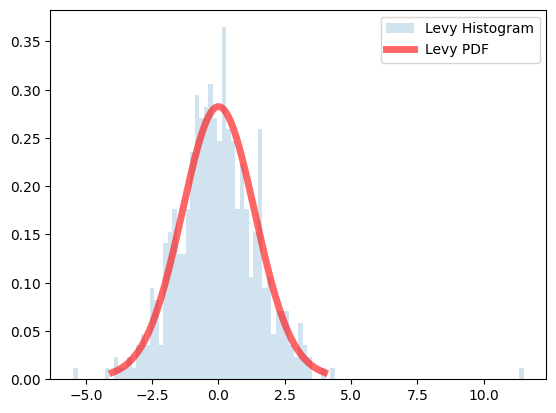

In [22]:
# Vars
sample_size = 500
alpha = 1.9
beta = 0
m = 0
values = levy_stable.rvs(alpha=alpha, beta=beta, size=sample_size)

# Resolution value
resolution = 200
aux_domain = np.linspace(-4, 4, resolution)

# Levy distr
levy_distr = np.array([levy_stable.pdf(x=i, alpha=alpha, beta=beta, loc=m) for i in aux_domain])

# Plot
fig, ax = plt.subplots(1, 1)

# Histogram
ax.hist(values, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='Levy Histogram')
ax.plot(aux_domain, levy_distr, '-r', lw=5, alpha=0.6, label='Levy PDF')

# Show leyends
ax.legend(loc='best')

plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory (6 pts)

* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.

In [123]:
# Init params
n_steps = 1000
s_pos = [0, 0]
speed = 6
velocity = Vec2d(speed, 0)
levy_exponent = 0.9

steps = [0, 1]
probs = [0.8, 0.2]

# DataFrame
levy_flight_df = pd.DataFrame(columns=['x_pos', 'y_pos'])
temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])
levy_flight_df = pd.concat([levy_flight_df, temp_df], ignore_index=True)

In [128]:
# Trajectory
for i in range(n_steps - 1):

  turn_angle = levy_stable.rvs(levy_exponent, beta=0)
  velocity = velocity.rotated(turn_angle)

  choice = np.random.choice(steps, p=probs)
  step_size = 1
  if choice:

    step_size = np.random.uniform(100, 1000)
    print(step_size)

  temp_df = pd.DataFrame([{'x_pos': levy_flight_df.x_pos[i] + velocity.x + step_size, 'y_pos': levy_flight_df.y_pos[i] + velocity.y}])
  levy_flight_df = pd.concat([levy_flight_df, temp_df], ignore_index=True)

430.6150478979757
929.9486132500983
274.61101668567477
110.30743639782705
608.4854213286844
213.33491006692458
523.5495285409745
668.5104419678645
144.78168472646212
796.1763984337616
661.8638507925104
179.49621947014367
721.2167825517305
599.9436401834333
792.5698803873246
537.1394771493518
776.4187397901761
799.1246365526554
137.11523749521803
748.4140087386297
855.7258791810305
348.57234285798313
508.0084799206776
824.2274655777985
903.3201097459345
517.322123844333
975.258154147248
613.7465236864243
848.2157730819521
826.4616155830158
666.7279867543099
112.37894779758028
240.39873578649244
501.3582995918402
276.8237566152841
200.88165239688843
157.65158411609718
234.05872330575153
507.935828506271
518.2279604783508
274.52181058325493
745.5987325804563
666.4421907398191
693.1569768051423
763.8000632189652
634.5599886174604
982.8840483494884
942.4649554654139
110.10704311226053
337.835908736394
608.6444603618143
886.6249314183385
321.3247988518995
989.8901587821304
837.5893227372252


In [129]:
# Plot
time_z = np.linspace(0, 1, n_steps)
fig_levy_flight_df = go.Figure()
fig_levy_flight_df.add_trace(
    go.Scatter3d(
      x = levy_flight_df.x_pos,
      y = levy_flight_df.y_pos,
      z = time_z,
      marker = dict(size=2),
      mode = 'lines',
      name = 'Levy Flight 3D',
      showlegend = True
    )
)

# Update figure params
fig_levy_flight_df.update_layout(title_text = "Levy Flight Trajectory in 3D",
                        autosize = False,
                        width = 800,
                        height = 800)

fig_levy_flight_df.show()


In [127]:
levy_flight_df.head(50)

,x_pos,y_pos
0,0,0
1,1.356134,5.844733
2,-3.11806,9.84243
3,-3.274358,15.840394
4,-1.526786,21.580254
5,3.88305,24.175187
6,9.041076,27.240275
7,7.01499,32.887838
8,12.489757,30.432858
9,6.504492,30.012603


## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories (7 pts)

* Generar tantas trayectorias tipo CRW como se especifique en una variable **n_traj**.
* Cada una de las trayectorias debera tener un coeficiente de Cauchy diferente.
* Utilizar **Vec2d**.
* Guardar trayectorias en **Pandas** Data Frame.
* Visualizar proyección en 3d con **plotly**.
* Exportar el Data Frame con las trayectorias a un archivo tipo *pkl*.